In [1]:
# We need to load the ensembles, corrected ensembles from lstm and LSTM for the test set
# and for DK1, DK2, Wind... on off shore
# we need to load the actual values for the test set

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


actuals = pd.read_pickle("loaded_variables/actuals_hourly_DK1_fixed.pkl")
ensembles_DK1_onshorewindpower = pd.read_pickle("loaded_variables/ensembles_wind_onshore_DK1_fixed.pkl")
ensembles_DK1_offshorewindpower = pd.read_pickle("loaded_variables/ensembles_wind_offshore_DK1_fixed.pkl")

Y_DK1_OnshoreWindPower = actuals["OnshoreWindPower"]
Y_DK1_OffshoreWindPower = actuals["OffshoreWindPower"]
Y_DK1_SolarPower = actuals["SolarPower"]

actuals = pd.read_pickle("loaded_variables/actuals_hourly_DK2_fixed.pkl")
ensembles_DK2_onshorewindpower = pd.read_pickle("loaded_variables/ensembles_wind_onshore_DK2_fixed.pkl")
ensembles_DK2_offshorewindpower = pd.read_pickle("loaded_variables/ensembles_wind_offshore_DK2_fixed.pkl")
Y_DK2_OnshoreWindPower = actuals["OnshoreWindPower"]
Y_DK2_OffshoreWindPower = actuals["OffshoreWindPower"]
Y_DK2_SolarPower = actuals["SolarPower"]

# load the corrected ensembles
Corrected_ensembles_DK1_OffshoreWindPower_lstm = pd.read_csv("results/DK1_OffshoreWindPower_lstm_corrected_ensembles_2024-05-20.csv")
Corrected_ensembles_DK1_OffshoreWindPower_lstm.set_index("HourDK", inplace=True)
Corrected_ensembles_DK1_OnshoreWindPower_lstm = pd.read_csv("results/DK1_OnshoreWindPower_lstm_corrected_ensembles_2024-05-20.csv")
Corrected_ensembles_DK1_OnshoreWindPower_lstm.set_index("HourDK", inplace=True)
Corrected_ensembles_DK1_OnshoreWindPower_lstm.index = pd.to_datetime(Corrected_ensembles_DK1_OnshoreWindPower_lstm.index)


Corrected_ensembles_DK2_OffshoreWindPower_lstm = pd.read_csv("results/DK2_OffshoreWindPower_lstm_corrected_ensembles_2024-05-20.csv")
Corrected_ensembles_DK2_OffshoreWindPower_lstm.set_index("HourDK", inplace=True)
Corrected_ensembles_DK2_OnshoreWindPower_lstm = pd.read_csv("results/DK2_OnshoreWindPower_lstm_corrected_ensembles_2024-05-20.csv")
Corrected_ensembles_DK2_OnshoreWindPower_lstm.set_index("HourDK", inplace=True)


Corrected_ensembles_DK1_OffshoreWindPower_FFNN = pd.read_csv("results/DK1_OffshoreWindPower_ffnn_corrected_ensembles_2024-05-20.csv")
Corrected_ensembles_DK1_OffshoreWindPower_FFNN.set_index("HourDK", inplace=True)
Corrected_ensembles_DK1_OnshoreWindPower_FFNN = pd.read_csv("results/DK1_OnshoreWindPower_ffnn_corrected_ensembles_2024-05-20.csv")
Corrected_ensembles_DK1_OnshoreWindPower_FFNN.set_index(pd.to_datetime(Corrected_ensembles_DK1_OnshoreWindPower_FFNN["HourDK"]), inplace=True)
Corrected_ensembles_DK1_OnshoreWindPower_FFNN.drop("HourDK", axis=1, inplace=True)
Corrected_ensembles_DK2_OffshoreWindPower_FFNN = pd.read_csv("results/DK2_OffshoreWindPower_ffnn_corrected_ensembles_2024-05-20.csv")
Corrected_ensembles_DK2_OffshoreWindPower_FFNN.set_index("HourDK", inplace=True)
Corrected_ensembles_DK2_OnshoreWindPower_FFNN = pd.read_csv("results/DK2_OnshoreWindPower_ffnn_corrected_ensembles_2024-05-20.csv")
Corrected_ensembles_DK2_OnshoreWindPower_FFNN.set_index("HourDK", inplace=True)






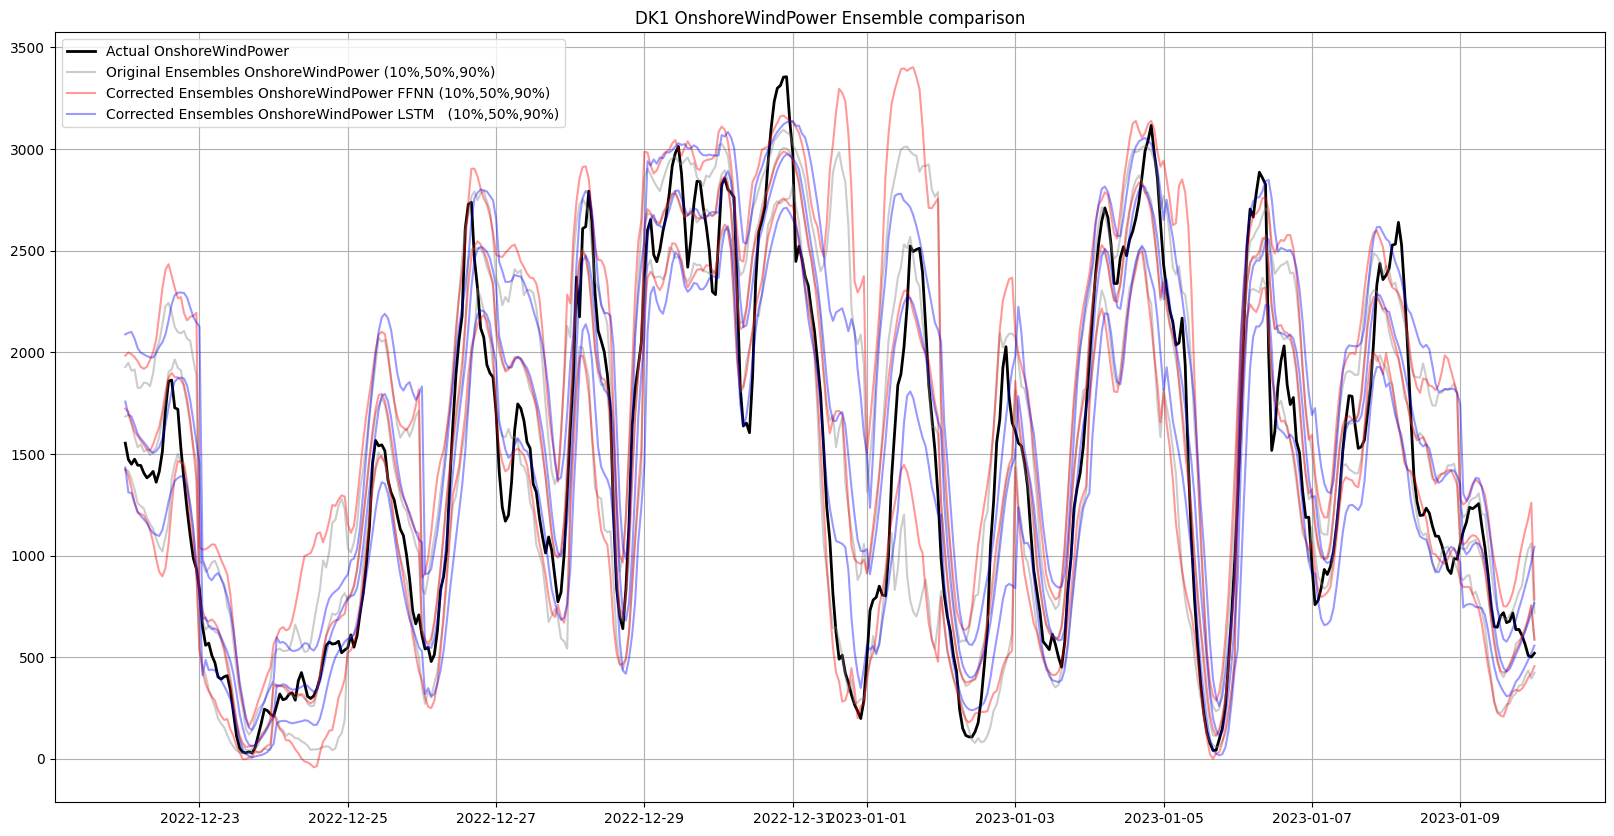

In [3]:
# selected period with an hourly index from 2022-04-01 to 2022-04-30
start_date = "2022-12-22"
end_date = "2023-01-10"
selected_index = pd.date_range(start=start_date, end=end_date, freq="h")


ensembles_DK1_onshorewindpower_sorted = ensembles_DK1_onshorewindpower.apply(lambda x: pd.Series(np.sort(x.values)), axis=1)
Corrected_ensembles_DK1_OnshoreWindPower_lstm_sorted = Corrected_ensembles_DK1_OnshoreWindPower_lstm.apply(lambda x: pd.Series(np.sort((x.values))), axis=1)
Corrected_ensembles_DK1_OnshoreWindPower_FFNN_sorted = Corrected_ensembles_DK1_OnshoreWindPower_FFNN.apply(lambda x: pd.Series(np.sort(x.values)), axis=1)
def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique))



plt.figure(figsize=(20, 10))
plt.title("DK1 OnshoreWindPower Ensemble comparison")
plt.plot(selected_index, Y_DK1_OnshoreWindPower.loc[selected_index], label="Actual OnshoreWindPower", color = "black", linewidth=2)
# plt.plot(selected_index, ensembles_DK1_onshorewindpower.loc[[1,2], selected_index], label="Ensembles OnshoreWindPower", color = "grey")
plt.plot(selected_index, ensembles_DK1_onshorewindpower_sorted.loc[selected_index][[4,25, 45]], label="Original Ensembles OnshoreWindPower (10%,50%,90%)", color = "grey",alpha=0.4)
plt.plot(selected_index, Corrected_ensembles_DK1_OnshoreWindPower_FFNN_sorted.loc[selected_index][[4,25, 45]], label="Corrected Ensembles OnshoreWindPower FFNN (10%,50%,90%)", color = "red",alpha=0.4)
plt.plot(selected_index, Corrected_ensembles_DK1_OnshoreWindPower_lstm_sorted.loc[selected_index.shift(-24)][[1,10,18]], label="Corrected Ensembles OnshoreWindPower LSTM   (10%,50%,90%)", color = "blue",alpha=0.4)
legend_without_duplicate_labels(plt.gca())
plt.grid()
plt.show()

In [4]:
np.linspace(0.05, 0.95, 20).round(3)[4]
print(np.linspace(0.01,0.99,50).round(3)[9])

0.19


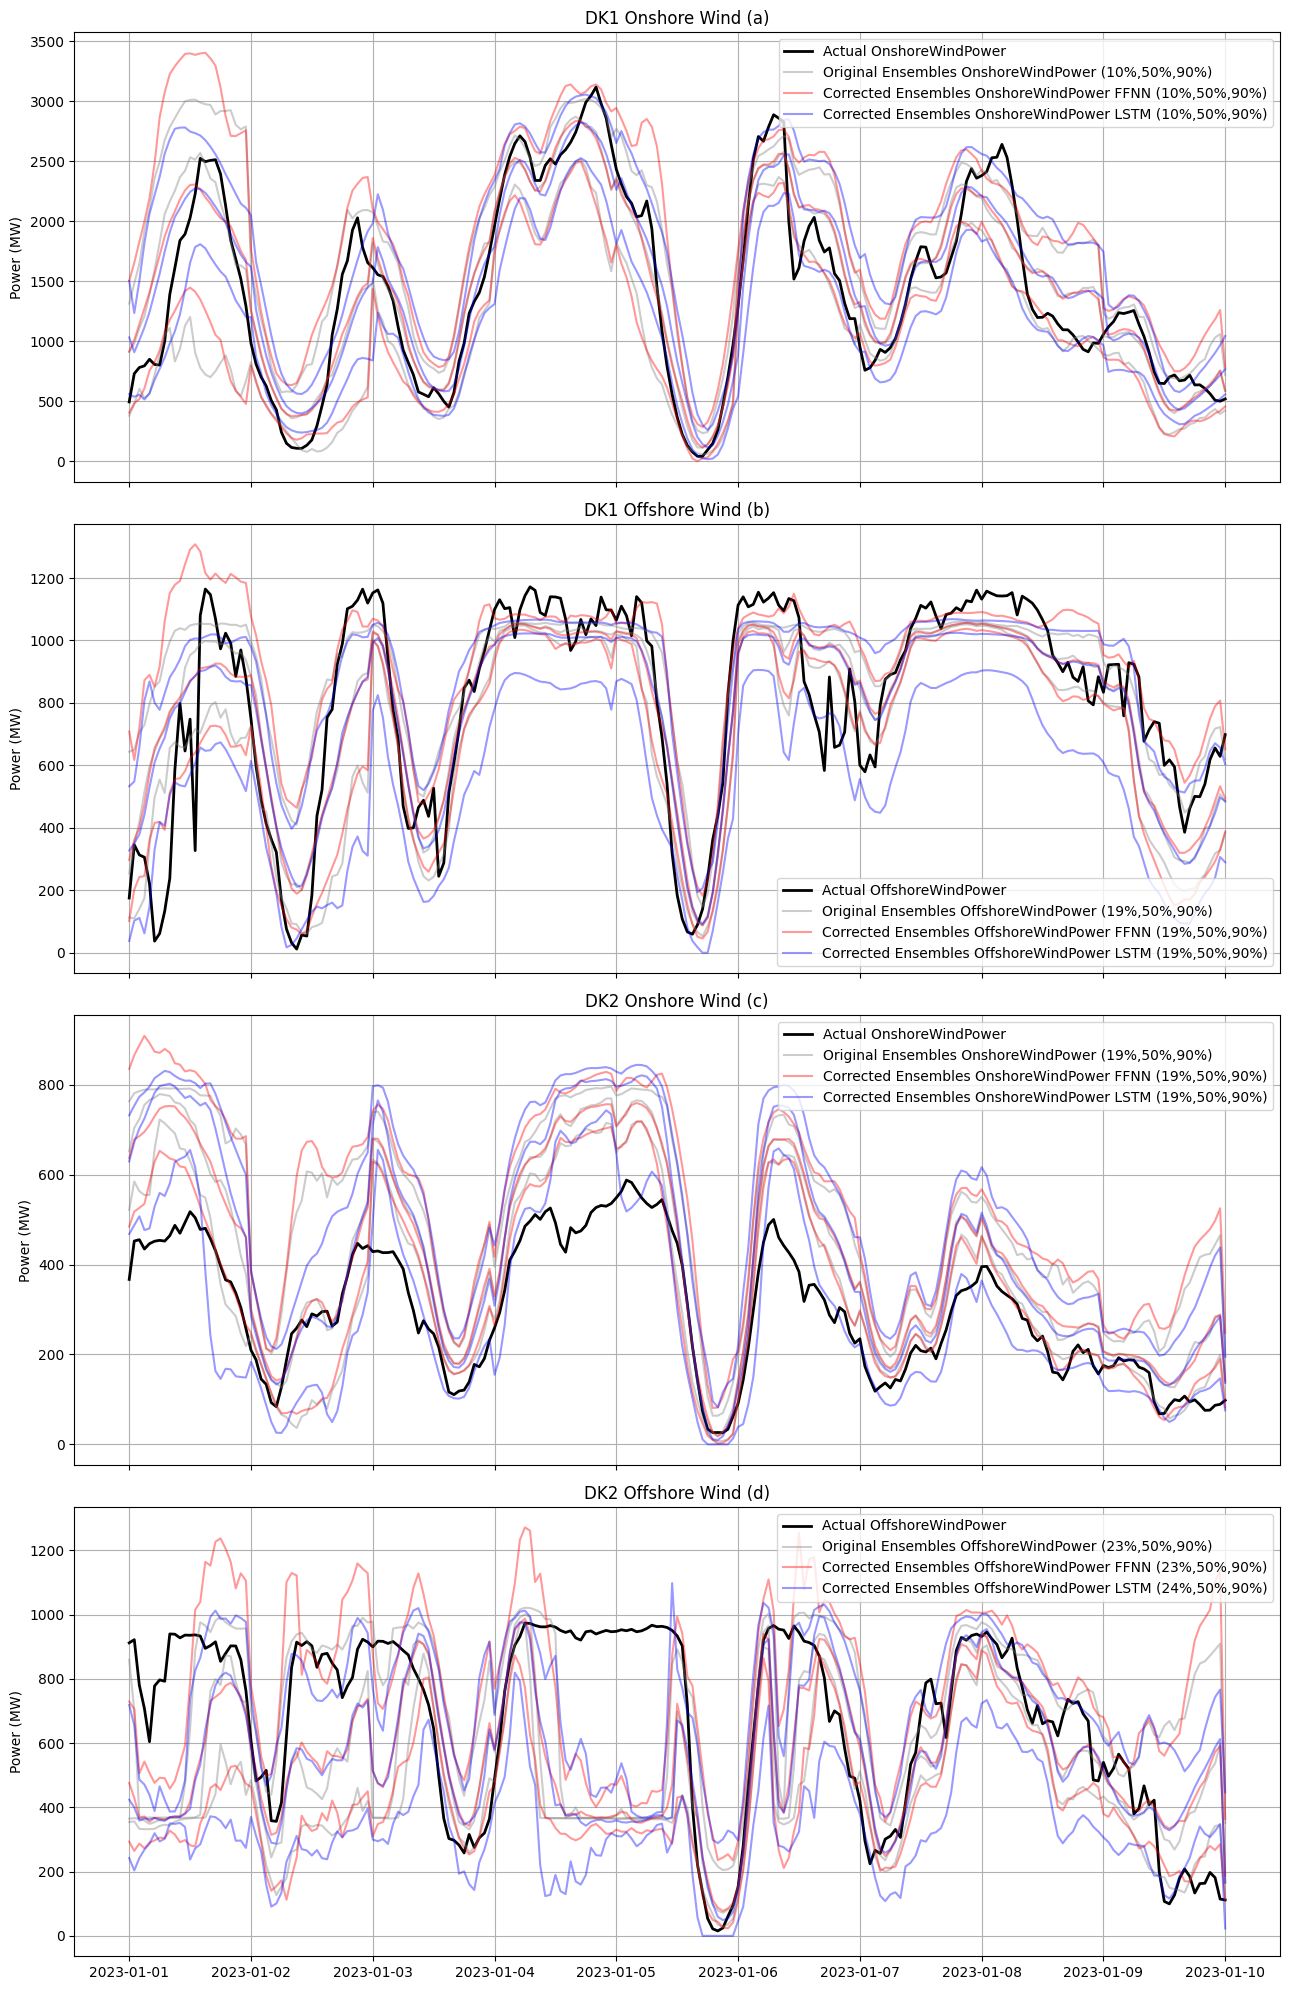

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
actuals_DK1 = pd.read_pickle("loaded_variables/actuals_hourly_DK1_fixed.pkl")
ensembles_DK1_onshorewindpower = pd.read_pickle("loaded_variables/ensembles_wind_onshore_DK1_fixed.pkl")
ensembles_DK1_offshorewindpower = pd.read_pickle("loaded_variables/ensembles_wind_offshore_DK1_fixed.pkl")
Y_DK1_OnshoreWindPower = actuals_DK1["OnshoreWindPower"]
Y_DK1_OffshoreWindPower = actuals_DK1["OffshoreWindPower"]
Y_DK1_SolarPower = actuals_DK1["SolarPower"]

actuals_DK2 = pd.read_pickle("loaded_variables/actuals_hourly_DK2_fixed.pkl")
ensembles_DK2_onshorewindpower = pd.read_pickle("loaded_variables/ensembles_wind_onshore_DK2_fixed.pkl")
ensembles_DK2_offshorewindpower = pd.read_pickle("loaded_variables/ensembles_wind_offshore_DK2_fixed.pkl")
Y_DK2_OnshoreWindPower = actuals_DK2["OnshoreWindPower"]
Y_DK2_OffshoreWindPower = actuals_DK2["OffshoreWindPower"]
Y_DK2_SolarPower = actuals_DK2["SolarPower"]

# Load the corrected ensembles
''' 
2024-05-30 is the good day for LSTM , 200 epochs, DK1 off, DK2 both. Takes approx. 0,4h to run 200 LSTM epochs...
'''
Corrected_ensembles_DK1_OffshoreWindPower_lstm = pd.read_csv("results/DK1_OffshoreWindPower_lstm_corrected_ensembles_2024-05-30.csv")
Corrected_ensembles_DK1_OffshoreWindPower_lstm.set_index("HourDK", inplace=True)
Corrected_ensembles_DK1_OffshoreWindPower_lstm.index = pd.to_datetime(Corrected_ensembles_DK1_OffshoreWindPower_lstm.index)

Corrected_ensembles_DK1_OnshoreWindPower_lstm = pd.read_csv("results/DK1_OnshoreWindPower_lstm_corrected_ensembles_2024-05-20.csv")
Corrected_ensembles_DK1_OnshoreWindPower_lstm.set_index("HourDK", inplace=True)
Corrected_ensembles_DK1_OnshoreWindPower_lstm.index = pd.to_datetime(Corrected_ensembles_DK1_OnshoreWindPower_lstm.index)

Corrected_ensembles_DK2_OffshoreWindPower_lstm = pd.read_csv("results/DK2_OffshoreWindPower_lstm_corrected_ensembles_2024-05-30.csv")
Corrected_ensembles_DK2_OffshoreWindPower_lstm.set_index("HourDK", inplace=True)
Corrected_ensembles_DK2_OffshoreWindPower_lstm.index = pd.to_datetime(Corrected_ensembles_DK2_OffshoreWindPower_lstm.index)

Corrected_ensembles_DK2_OnshoreWindPower_lstm = pd.read_csv("results/DK2_OnshoreWindPower_lstm_corrected_ensembles_2024-05-30.csv")
Corrected_ensembles_DK2_OnshoreWindPower_lstm.set_index("HourDK", inplace=True)
Corrected_ensembles_DK2_OnshoreWindPower_lstm.index = pd.to_datetime(Corrected_ensembles_DK2_OnshoreWindPower_lstm.index)

Corrected_ensembles_DK1_OffshoreWindPower_FFNN = pd.read_csv("results/DK1_OffshoreWindPower_ffnn_corrected_ensembles_2024-05-20.csv")
Corrected_ensembles_DK1_OffshoreWindPower_FFNN.set_index(pd.to_datetime(Corrected_ensembles_DK1_OffshoreWindPower_FFNN["HourDK"]), inplace=True)
Corrected_ensembles_DK1_OffshoreWindPower_FFNN.drop("HourDK", axis=1, inplace=True)

Corrected_ensembles_DK1_OnshoreWindPower_FFNN = pd.read_csv("results/DK1_OnshoreWindPower_ffnn_corrected_ensembles_2024-05-20.csv")
Corrected_ensembles_DK1_OnshoreWindPower_FFNN.set_index(pd.to_datetime(Corrected_ensembles_DK1_OnshoreWindPower_FFNN["HourDK"]), inplace=True)
Corrected_ensembles_DK1_OnshoreWindPower_FFNN.drop("HourDK", axis=1, inplace=True)

Corrected_ensembles_DK2_OffshoreWindPower_FFNN = pd.read_csv("results/DK2_OffshoreWindPower_ffnn_corrected_ensembles_2024-05-20.csv")
Corrected_ensembles_DK2_OffshoreWindPower_FFNN.set_index(pd.to_datetime(Corrected_ensembles_DK2_OffshoreWindPower_FFNN["HourDK"]), inplace=True)
Corrected_ensembles_DK2_OffshoreWindPower_FFNN.drop("HourDK", axis=1, inplace=True)

Corrected_ensembles_DK2_OnshoreWindPower_FFNN = pd.read_csv("results/DK2_OnshoreWindPower_ffnn_corrected_ensembles_2024-05-20.csv")
Corrected_ensembles_DK2_OnshoreWindPower_FFNN.set_index(pd.to_datetime(Corrected_ensembles_DK2_OnshoreWindPower_FFNN["HourDK"]), inplace=True)
Corrected_ensembles_DK2_OnshoreWindPower_FFNN.drop("HourDK", axis=1, inplace=True)

# Selected period with an hourly index
start_date = "2023-01-01"
end_date = "2023-01-10"
selected_index = pd.date_range(start=start_date, end=end_date, freq="h")

# Sorting ensembles
ensembles_DK1_onshorewindpower_sorted = ensembles_DK1_onshorewindpower.apply(lambda x: pd.Series(np.sort(x.values)), axis=1)
Corrected_ensembles_DK1_OnshoreWindPower_lstm_sorted = Corrected_ensembles_DK1_OnshoreWindPower_lstm.apply(lambda x: pd.Series(np.sort((x.values))), axis=1)
Corrected_ensembles_DK1_OnshoreWindPower_FFNN_sorted = Corrected_ensembles_DK1_OnshoreWindPower_FFNN.apply(lambda x: pd.Series(np.sort(x.values)), axis=1)

ensembles_DK1_offshorewindpower_sorted = ensembles_DK1_offshorewindpower.apply(lambda x: pd.Series(np.sort(x.values)), axis=1)
Corrected_ensembles_DK1_OffshoreWindPower_lstm_sorted = Corrected_ensembles_DK1_OffshoreWindPower_lstm.apply(lambda x: pd.Series(np.sort((x.values))), axis=1)
Corrected_ensembles_DK1_OffshoreWindPower_FFNN_sorted = Corrected_ensembles_DK1_OffshoreWindPower_FFNN.apply(lambda x: pd.Series(np.sort(x.values)), axis=1)

ensembles_DK2_onshorewindpower_sorted = ensembles_DK2_onshorewindpower.apply(lambda x: pd.Series(np.sort(x.values)), axis=1)
Corrected_ensembles_DK2_OnshoreWindPower_lstm_sorted = Corrected_ensembles_DK2_OnshoreWindPower_lstm.apply(lambda x: pd.Series(np.sort((x.values))), axis=1)
Corrected_ensembles_DK2_OnshoreWindPower_FFNN_sorted = Corrected_ensembles_DK2_OnshoreWindPower_FFNN.apply(lambda x: pd.Series(np.sort(x.values)), axis=1)

ensembles_DK2_offshorewindpower_sorted = ensembles_DK2_offshorewindpower.apply(lambda x: pd.Series(np.sort(x.values)), axis=1)
Corrected_ensembles_DK2_OffshoreWindPower_lstm_sorted = Corrected_ensembles_DK2_OffshoreWindPower_lstm.apply(lambda x: pd.Series(np.sort((x.values))), axis=1)
Corrected_ensembles_DK2_OffshoreWindPower_FFNN_sorted = Corrected_ensembles_DK2_OffshoreWindPower_FFNN.apply(lambda x: pd.Series(np.sort(x.values)), axis=1)

# Function to avoid duplicate labels in legend
def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique))

# Plotting
fig, axes = plt.subplots(4, 1, figsize=(13, 20))

# DK1 Onshore Wind Power
axes[0].set_title("DK1 Onshore Wind (a)")
axes[0].plot(selected_index, Y_DK1_OnshoreWindPower.loc[selected_index], label="Actual OnshoreWindPower", color="black", linewidth=2)
axes[0].plot(selected_index, ensembles_DK1_onshorewindpower_sorted.loc[selected_index][[4, 25, 45]], label="Original Ensembles OnshoreWindPower (10%,50%,90%)", color="grey", alpha=0.4)
axes[0].plot(selected_index, Corrected_ensembles_DK1_OnshoreWindPower_FFNN_sorted.loc[selected_index][[4, 25, 45]], label="Corrected Ensembles OnshoreWindPower FFNN (10%,50%,90%)", color="red", alpha=0.4)
axes[0].plot(selected_index, Corrected_ensembles_DK1_OnshoreWindPower_lstm_sorted.loc[selected_index.shift(-24)][[1, 10, 18]], label="Corrected Ensembles OnshoreWindPower LSTM (10%,50%,90%)", color="blue", alpha=0.4)
legend_without_duplicate_labels(axes[0])
axes[0].set_xticklabels([])
# set ylabel to Power (MW)
axes[0].set_ylabel("Power (MW)")
axes[0].grid()



# DK1 Offshore Wind Power
axes[1].set_title("DK1 Offshore Wind (b)")
axes[1].plot(selected_index, Y_DK1_OffshoreWindPower.loc[selected_index], label="Actual OffshoreWindPower", color="black", linewidth=2)
axes[1].plot(selected_index, ensembles_DK1_offshorewindpower_sorted.loc[selected_index][[9, 25, 45]], label="Original Ensembles OffshoreWindPower (19%,50%,90%)", color="grey", alpha=0.4)
axes[1].plot(selected_index, Corrected_ensembles_DK1_OffshoreWindPower_FFNN_sorted.loc[selected_index][[9, 25, 45]], label="Corrected Ensembles OffshoreWindPower FFNN (19%,50%,90%)", color="red", alpha=0.4)
axes[1].plot(selected_index, Corrected_ensembles_DK1_OffshoreWindPower_lstm_sorted.loc[selected_index.shift(0)][[2, 10, 18]], label="Corrected Ensembles OffshoreWindPower LSTM (19%,50%,90%)", color="blue", alpha=0.4)
legend_without_duplicate_labels(axes[1])
# remove x tick labels
axes[1].set_xticklabels([])
axes[1].set_ylabel("Power (MW)")
axes[1].grid()

#DK2 Onshore Wind Power
axes[2].set_title("DK2 Onshore Wind (c)")
axes[2].plot(selected_index, Y_DK2_OnshoreWindPower.loc[selected_index], label="Actual OnshoreWindPower", color="black", linewidth=2)
axes[2].plot(selected_index, ensembles_DK2_onshorewindpower_sorted.loc[selected_index][[9, 25, 45]], label="Original Ensembles OnshoreWindPower (19%,50%,90%)", color="grey", alpha=0.4)
axes[2].plot(selected_index, Corrected_ensembles_DK2_OnshoreWindPower_FFNN_sorted.loc[selected_index][[9, 25, 45]], label="Corrected Ensembles OnshoreWindPower FFNN (19%,50%,90%)", color="red", alpha=0.4)
axes[2].plot(selected_index, Corrected_ensembles_DK2_OnshoreWindPower_lstm_sorted.loc[selected_index.shift(0)][[2, 10, 18]], label="Corrected Ensembles OnshoreWindPower LSTM (19%,50%,90%)", color="blue", alpha=0.4)
legend_without_duplicate_labels(axes[2])
axes[2].set_xticklabels([])
axes[2].set_ylabel("Power (MW)")
axes[2].grid()


#DK2 Offshore Wind Power
axes[3].set_title("DK2 Offshore Wind (d)")
axes[3].plot(selected_index, Y_DK2_OffshoreWindPower.loc[selected_index], label="Actual OffshoreWindPower", color="black", linewidth=2)
axes[3].plot(selected_index, ensembles_DK2_offshorewindpower_sorted.loc[selected_index][[11, 25, 45]], label="Original Ensembles OffshoreWindPower (23%,50%,90%)", color="grey", alpha=0.4)
axes[3].plot(selected_index, Corrected_ensembles_DK2_OffshoreWindPower_FFNN_sorted.loc[selected_index][[11, 25, 45]], label="Corrected Ensembles OffshoreWindPower FFNN (23%,50%,90%)", color="red", alpha=0.4)
axes[3].plot(selected_index, Corrected_ensembles_DK2_OffshoreWindPower_lstm_sorted.loc[selected_index.shift(0)][[4, 10, 18]], label="Corrected Ensembles OffshoreWindPower LSTM (24%,50%,90%)", color="blue", alpha=0.4)
legend_without_duplicate_labels(axes[3])
axes[3].set_ylabel("Power (MW)")
axes[3].grid()

plt.tight_layout()
plt.savefig("comparing_corrected_ensembles.pdf")
plt.show()

In [6]:
sum(Corrected_ensembles_DK1_OnshoreWindPower_FFNN_sorted.loc[selected_index][45] > Y_DK1_OnshoreWindPower.loc[selected_index])/len(selected_index)

0.9447004608294931

In [7]:
sum(Corrected_ensembles_DK1_OnshoreWindPower_FFNN_sorted[45] > Y_DK1_OnshoreWindPower.loc[Corrected_ensembles_DK1_OnshoreWindPower_FFNN_sorted.index])/len(Corrected_ensembles_DK1_OnshoreWindPower_FFNN_sorted.index)

0.9138851802403204

In [8]:
sum(ensembles_DK1_onshorewindpower_sorted.loc[Y_DK1_OnshoreWindPower.index][45] > Y_DK1_OnshoreWindPower)/len(Y_DK1_OnshoreWindPower.index)

0.837767094017094

In [9]:
# Gap calculation 
Gap_FFNN = sum(Corrected_ensembles_DK1_OnshoreWindPower_FFNN_sorted[45] - Corrected_ensembles_DK1_OnshoreWindPower_FFNN_sorted[4])/len(Corrected_ensembles_DK1_OnshoreWindPower_FFNN_sorted)
Gap_FFNN

656.495968638785

In [10]:
Gap_LSTM = sum(Corrected_ensembles_DK1_OnshoreWindPower_lstm_sorted[18] - Corrected_ensembles_DK1_OnshoreWindPower_lstm_sorted[1])/len(Corrected_ensembles_DK1_OnshoreWindPower_lstm_sorted)
Gap_LSTM

643.2294747065135

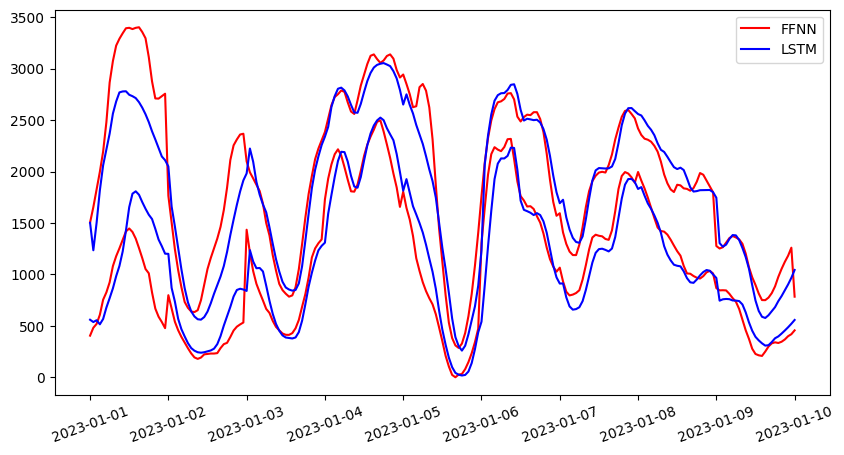

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(selected_index, Corrected_ensembles_DK1_OnshoreWindPower_FFNN_sorted.loc[selected_index][[4,45]], color = "red", label = "FFNN")
plt.plot(selected_index, Corrected_ensembles_DK1_OnshoreWindPower_lstm_sorted.loc[selected_index.shift(-24)][[1,18]], color = "blue", label = "LSTM")
legend_without_duplicate_labels(plt.gca())
# rotate x labels
plt.xticks(rotation=20)
plt.savefig("gap_comparison_FFNN_v_LSTM.pdf")

In [12]:
len(ensembles_DK1_offshorewindpower.iloc[int(0.8*len(ensembles_DK1_offshorewindpower)):].values.flatten())

194948

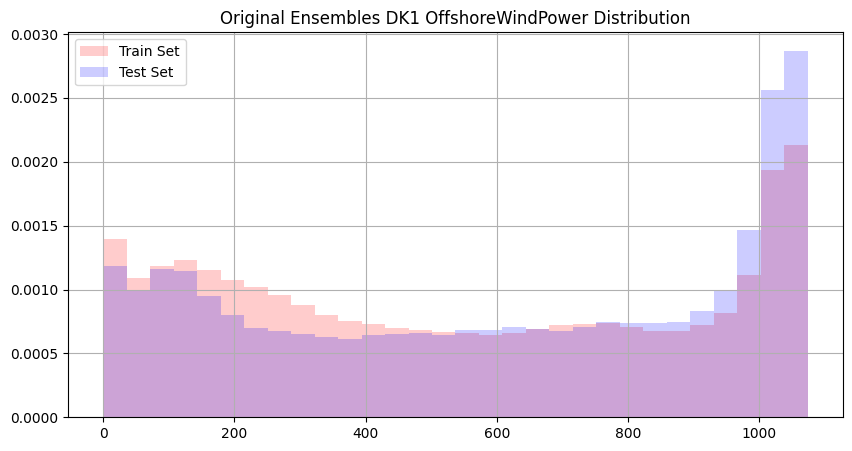

In [13]:
# plot distribution of values in ensembles_DK1_offshorewindpower.iloc[0.8*len(ensembles_DK1_offshorewindpower)]
plt.figure(figsize=(10, 5))
plt.title("Original Ensembles DK1 OffshoreWindPower Distribution")
plt.hist(ensembles_DK1_offshorewindpower.iloc[:int(0.8*len(ensembles_DK1_offshorewindpower))].values.flatten(), bins=30, alpha=0.2, label="Train Set", color = "red", density=True)
# overlay with the remaining 20% of the ensembles
plt.hist(ensembles_DK1_offshorewindpower.iloc[:int(0.2*len(ensembles_DK1_offshorewindpower))].values.flatten(), bins=30, alpha=0.2, label="Test Set", color = "blue", density=True)
plt.legend()
plt.grid()
plt.savefig("original_ensembles_offshorewindpower_distribution.pdf")
plt.show()

In [14]:
a = np.linspace(0,100,100)
a[80:]

array([ 80.80808081,  81.81818182,  82.82828283,  83.83838384,
        84.84848485,  85.85858586,  86.86868687,  87.87878788,
        88.88888889,  89.8989899 ,  90.90909091,  91.91919192,
        92.92929293,  93.93939394,  94.94949495,  95.95959596,
        96.96969697,  97.97979798,  98.98989899, 100.        ])

In [15]:
a[:80]

array([ 0.        ,  1.01010101,  2.02020202,  3.03030303,  4.04040404,
        5.05050505,  6.06060606,  7.07070707,  8.08080808,  9.09090909,
       10.1010101 , 11.11111111, 12.12121212, 13.13131313, 14.14141414,
       15.15151515, 16.16161616, 17.17171717, 18.18181818, 19.19191919,
       20.2020202 , 21.21212121, 22.22222222, 23.23232323, 24.24242424,
       25.25252525, 26.26262626, 27.27272727, 28.28282828, 29.29292929,
       30.3030303 , 31.31313131, 32.32323232, 33.33333333, 34.34343434,
       35.35353535, 36.36363636, 37.37373737, 38.38383838, 39.39393939,
       40.4040404 , 41.41414141, 42.42424242, 43.43434343, 44.44444444,
       45.45454545, 46.46464646, 47.47474747, 48.48484848, 49.49494949,
       50.50505051, 51.51515152, 52.52525253, 53.53535354, 54.54545455,
       55.55555556, 56.56565657, 57.57575758, 58.58585859, 59.5959596 ,
       60.60606061, 61.61616162, 62.62626263, 63.63636364, 64.64646465,
       65.65656566, 66.66666667, 67.67676768, 68.68686869, 69.69

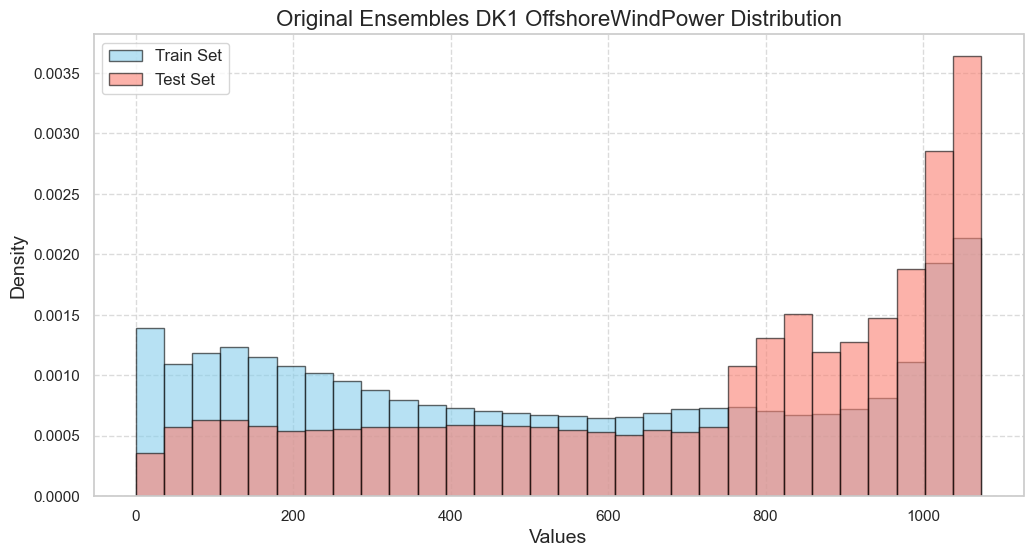

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the seaborn style
sns.set(style="whitegrid")

# Sample DataFrame
# ensembles_DK1_offshorewindpower should be defined somewhere in your actual code

# Create the figure and axis
plt.figure(figsize=(12, 6))

# Add a title
plt.title("Original Ensembles DK1 OffshoreWindPower Distribution", fontsize=16)

# Plot the histogram for the train set
plt.hist(
    ensembles_DK1_offshorewindpower.iloc[:int(0.8*len(ensembles_DK1_offshorewindpower))].values.flatten(),
    bins=30,
    alpha=0.6,
    label="Train Set",
    color="skyblue",
    edgecolor='black',
    density=True
)

# Plot the histogram for the test set
plt.hist(
    ensembles_DK1_offshorewindpower.iloc[int(0.8*len(ensembles_DK1_offshorewindpower)):].values.flatten(),
    bins=30,
    alpha=0.6,
    label="Test Set",
    color="salmon",
    edgecolor='black',
    density=True
)

# Add labels
plt.xlabel("Values", fontsize=14)
plt.ylabel("Density", fontsize=14)

# Add a legend
plt.legend(fontsize=12)

# Add grid
plt.grid(True, linestyle='--', alpha=0.7)

# Save the figure
plt.savefig("original_ensembles_offshorewindpower_distribution_pretty.pdf", bbox_inches='tight')

# Show the plot
plt.show()

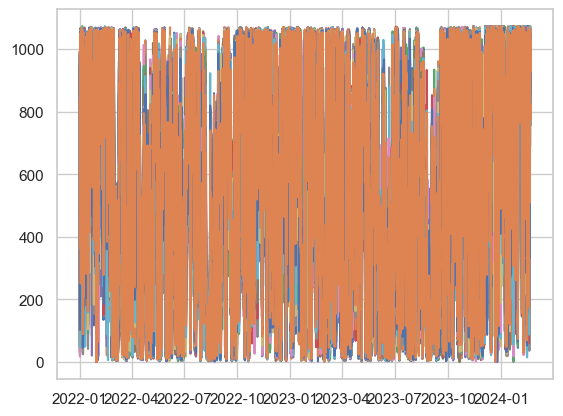

In [17]:
plt.plot(ensembles_DK1_offshorewindpower)
plt.show()

In [18]:
# Loading the ensembles and actuals
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


actuals = pd.read_pickle("loaded_variables/actuals_hourly_DK1_fixed.pkl")
ensembles_DK1_onshorewindpower = pd.read_pickle("loaded_variables/ensembles_wind_onshore_DK1_fixed.pkl")
ensembles_DK1_offshorewindpower = pd.read_pickle("loaded_variables/ensembles_wind_offshore_DK1_fixed.pkl")
ensembles_DK1_solarpower = pd.read_pickle("loaded_variables/ensembles_solar_DK1_fixed_v2.pkl")

Y_DK1_OnshoreWindPower = actuals["OnshoreWindPower"]
Y_DK1_OffshoreWindPower = actuals["OffshoreWindPower"]
Y_DK1_SolarPower = actuals["SolarPower"]

actuals = pd.read_pickle("loaded_variables/actuals_hourly_DK2_fixed.pkl")
ensembles_DK2_onshorewindpower = pd.read_pickle("loaded_variables/ensembles_wind_onshore_DK2_fixed.pkl")
ensembles_DK2_offshorewindpower = pd.read_pickle("loaded_variables/ensembles_wind_offshore_DK2_fixed.pkl")
ensembles_DK2_solarpower = pd.read_pickle("loaded_variables/ensembles_solar_DK2_fixed_v2.pkl")
Y_DK2_OnshoreWindPower = actuals["OnshoreWindPower"]
Y_DK2_OffshoreWindPower = actuals["OffshoreWindPower"]
Y_DK2_SolarPower = actuals["SolarPower"]

# load the corrected ensembles
Corrected_ensembles_DK1_OffshoreWindPower_lstm = pd.read_csv("results/DK1_OffshoreWindPower_lstm_corrected_ensembles_2024-05-20.csv")
Corrected_ensembles_DK1_OffshoreWindPower_lstm.set_index("HourDK", inplace=True)
Corrected_ensembles_DK1_OnshoreWindPower_lstm = pd.read_csv("results/DK1_OnshoreWindPower_lstm_corrected_ensembles_2024-05-20.csv")
Corrected_ensembles_DK1_OnshoreWindPower_lstm.set_index("HourDK", inplace=True)
Corrected_ensembles_DK1_OnshoreWindPower_lstm.index = pd.to_datetime(Corrected_ensembles_DK1_OnshoreWindPower_lstm.index)


Corrected_ensembles_DK2_OffshoreWindPower_lstm = pd.read_csv("results/DK2_OffshoreWindPower_lstm_corrected_ensembles_2024-05-20.csv")
Corrected_ensembles_DK2_OffshoreWindPower_lstm.set_index("HourDK", inplace=True)
Corrected_ensembles_DK2_OnshoreWindPower_lstm = pd.read_csv("results/DK2_OnshoreWindPower_lstm_corrected_ensembles_2024-05-20.csv")
Corrected_ensembles_DK2_OnshoreWindPower_lstm.set_index("HourDK", inplace=True)


Corrected_ensembles_DK1_OffshoreWindPower_FFNN = pd.read_csv("results/DK1_OffshoreWindPower_ffnn_corrected_ensembles_2024-05-20.csv")
Corrected_ensembles_DK1_OffshoreWindPower_FFNN.set_index("HourDK", inplace=True)
Corrected_ensembles_DK1_OnshoreWindPower_FFNN = pd.read_csv("results/DK1_OnshoreWindPower_ffnn_corrected_ensembles_2024-05-20.csv")
Corrected_ensembles_DK1_OnshoreWindPower_FFNN.set_index(pd.to_datetime(Corrected_ensembles_DK1_OnshoreWindPower_FFNN["HourDK"]), inplace=True)
Corrected_ensembles_DK1_OnshoreWindPower_FFNN.drop("HourDK", axis=1, inplace=True)
Corrected_ensembles_DK2_OffshoreWindPower_FFNN = pd.read_csv("results/DK2_OffshoreWindPower_ffnn_corrected_ensembles_2024-05-20.csv")
Corrected_ensembles_DK2_OffshoreWindPower_FFNN.set_index("HourDK", inplace=True)
Corrected_ensembles_DK2_OnshoreWindPower_FFNN = pd.read_csv("results/DK2_OnshoreWindPower_ffnn_corrected_ensembles_2024-05-20.csv")
Corrected_ensembles_DK2_OnshoreWindPower_FFNN.set_index("HourDK", inplace=True)

Corrected_ensembles_DK1_SolarPower_FFNN = pd.read_csv("results/DK1_SolarPower_ffnn_corrected_ensembles_2024-06-11.csv", index_col=0)
Corrected_ensembles_DK1_SolarPower_FFNN.index = pd.to_datetime(Corrected_ensembles_DK1_SolarPower_FFNN.index)
Corrected_ensembles_DK1_SolarPower_FFNN.set_index(Corrected_ensembles_DK1_SolarPower_FFNN.index, inplace=True)
Corrected_ensembles_DK2_SolarPower_FFNN = pd.read_csv("results/DK2_SolarPower_ffnn_corrected_ensembles_2024-06-11.csv", index_col=0)
Corrected_ensembles_DK2_SolarPower_FFNN.index = pd.to_datetime(Corrected_ensembles_DK2_SolarPower_FFNN.index)
Corrected_ensembles_DK2_SolarPower_FFNN.set_index(Corrected_ensembles_DK2_SolarPower_FFNN.index, inplace=True)


Corrected_ensembles_DK1_SolarPower_lstm = pd.read_csv("results/DK1_SolarPower_lstm_corrected_ensembles_2024-06-24.csv", index_col=0)
Corrected_ensembles_DK1_SolarPower_lstm.index = pd.to_datetime(Corrected_ensembles_DK1_SolarPower_lstm.index)
Corrected_ensembles_DK1_SolarPower_lstm.set_index(Corrected_ensembles_DK1_SolarPower_lstm.index, inplace=True)
Corrected_ensembles_DK2_SolarPower_lstm = pd.read_csv("results/DK2_SolarPower_lstm_corrected_ensembles_2024-06-25.csv", index_col=0)
Corrected_ensembles_DK2_SolarPower_lstm.index = pd.to_datetime(Corrected_ensembles_DK2_SolarPower_lstm.index)
Corrected_ensembles_DK2_SolarPower_lstm.set_index(Corrected_ensembles_DK2_SolarPower_lstm.index, inplace=True)



In [20]:
from function_for_SDE_correction import calculate_crps, variogram_score_R, calculate_qss

In [34]:
# Define regions and power types
regions = ["DK1", "DK2"]
power_types = ["OnshoreWindPower", "OffshoreWindPower", "SolarPower"]

# Corrected ensembles dictionaries
corrected_ensembles_dict = {
    "DK1_OnshoreWindPower": {
        "LSTM": Corrected_ensembles_DK1_OnshoreWindPower_lstm,
        "FFNN": Corrected_ensembles_DK1_OnshoreWindPower_FFNN
    },
    "DK2_OnshoreWindPower": {
        "LSTM": Corrected_ensembles_DK2_OnshoreWindPower_lstm,
        "FFNN": Corrected_ensembles_DK2_OnshoreWindPower_FFNN
    },
    "DK1_OffshoreWindPower": {
        "LSTM": Corrected_ensembles_DK1_OffshoreWindPower_lstm,
        "FFNN": Corrected_ensembles_DK1_OffshoreWindPower_FFNN
    },
    "DK2_OffshoreWindPower": {
        "LSTM": Corrected_ensembles_DK2_OffshoreWindPower_lstm,
        "FFNN": Corrected_ensembles_DK2_OffshoreWindPower_FFNN
    },
    "DK1_SolarPower": {
        "LSTM": Corrected_ensembles_DK1_SolarPower_lstm,
        "FFNN": Corrected_ensembles_DK1_SolarPower_FFNN
    },
    "DK2_SolarPower": {
        "LSTM": Corrected_ensembles_DK2_SolarPower_lstm,
        "FFNN": Corrected_ensembles_DK2_SolarPower_FFNN
    }
}

# Actuals dictionaries
actuals_dict = {
    "DK1_OnshoreWindPower": Y_DK1_OnshoreWindPower,
    "DK2_OnshoreWindPower": Y_DK2_OnshoreWindPower,
    "DK1_OffshoreWindPower": Y_DK1_OffshoreWindPower,
    "DK2_OffshoreWindPower": Y_DK2_OffshoreWindPower,
    "DK1_SolarPower": Y_DK1_SolarPower,
    "DK2_SolarPower": Y_DK2_SolarPower
}

results = []

# Calculate scores for each region, power type, and model
for key, corrected_ensembles in corrected_ensembles_dict.items():
    region, power_type = key.split("_")
    actuals = actuals_dict[key]
    print("len of actuals: ", len(actuals))
    for model, corrected_ensemble in corrected_ensembles.items():
        # print("length: ", len(actuals), "ensemble", len(corrected_ensemble.values))
        if not isinstance(corrected_ensemble.index, pd.DatetimeIndex):
            corrected_ensemble.index = pd.to_datetime(corrected_ensemble.index)
        print("model: ", model)
        print("shape of ensemble: ", np.array(corrected_ensemble.values).shape) 
        ce_idx = corrected_ensemble.index
        act_idx = actuals.index
        print("type of ce and act idx: ", type(ce_idx), type(act_idx))
        common_idx = ce_idx.intersection(act_idx)
        print("length of common index: ", len(common_idx))
        actuals = actuals.loc[common_idx]
        corrected_ensemble = corrected_ensemble.loc[common_idx]
        crps = calculate_crps(actuals, corrected_ensemble.values)
        m1, k1 = np.array(corrected_ensemble.values).shape
        if m1 != 0:
            variogram = variogram_score_R(np.array(corrected_ensemble.values), actuals, p = 0.5)
            N, qs = corrected_ensemble.shape
            quantiles = np.linspace(0.05, 0.95, qs)
            # print the number of zeros
            # print("number of zeros in actuals: ", sum(actuals == 0))
            # print("number of zeros in corrected_ensemble: ", sum(corrected_ensemble.values == 0))
            qss = np.mean(calculate_qss(actuals, corrected_ensemble.values, quantiles))
            results.append([region, power_type, model, crps, variogram, qss])
        else:
            print("Ensemble not good for ", key, model, region, power_type)

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=["Region", "Type", "Model", "CRPS", "Variogram Score", "QSS"])

results_df

len of actuals:  18720
model:  LSTM
shape of ensemble:  (1480, 20)
type of ce and act idx:  <class 'pandas.core.indexes.datetimes.DatetimeIndex'> <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
length of common index:  1480
m,k:  1480 20
model:  FFNN
shape of ensemble:  (1498, 50)
type of ce and act idx:  <class 'pandas.core.indexes.datetimes.DatetimeIndex'> <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
length of common index:  1474
m,k:  1474 50
len of actuals:  18720
model:  LSTM
shape of ensemble:  (1480, 20)
type of ce and act idx:  <class 'pandas.core.indexes.datetimes.DatetimeIndex'> <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
length of common index:  1480
m,k:  1480 20
model:  FFNN
shape of ensemble:  (1498, 50)
type of ce and act idx:  <class 'pandas.core.indexes.datetimes.DatetimeIndex'> <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
length of common index:  1474
m,k:  1474 50
len of actuals:  18720
model:  LSTM
shape of ensemble:  (1480, 20)
typ

/Users/bastian/Library/CloudStorage/Dropbox/DTU (Semester 10)/MscThesis/MscThesisCode_NN/multimodel_quantile_loss_network_working_TDS_article_functions.py:261: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  score += (np.abs(y[i] - y[j])**p - Ediff)**2
/Users/bastian/Library/CloudStorage/Dropbox/DTU (Semester 10)/MscThesis/MscThesisCode_NN/multimodel_quantile_loss_network_working_TDS_article_functions.py:261: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  score += (np.abs(y[i] - y[j])**p - Ediff)**2
/Users/bastian/Library/CloudStorage/Dropbox/DTU (Semester 10)/MscThesis/MscThesisCode_NN/multimodel_quantile_loss_network_

,Region,Type,Model,CRPS,Variogram Score,QSS
0,DK1,OnshoreWindPower,LSTM,770.423805,14296.578417,3.202343
1,DK1,OnshoreWindPower,FFNN,145.320772,101093.604668,9.600041
2,DK2,OnshoreWindPower,LSTM,159.179021,8908.346333,1.447262
3,DK2,OnshoreWindPower,FFNN,100.804877,34256.858481,1.973203
4,DK1,OffshoreWindPower,LSTM,268.180393,22254.134783,2.188849
5,DK1,OffshoreWindPower,FFNN,97.480894,87058.681862,5.142226
6,DK2,OffshoreWindPower,LSTM,286.060874,15619.704066,2.864419
7,DK2,OffshoreWindPower,FFNN,162.350666,98338.522251,3.645430
8,DK1,SolarPower,LSTM,202.857433,22543.969850,3.419600
9,DK1,SolarPower,FFNN,235.474396,196077.053284,8.331474


In [54]:
df_for_latex = results_df.round(2)
df_for_latex.to_latex("results/corrected_ensembles_scores.tex", index=False)

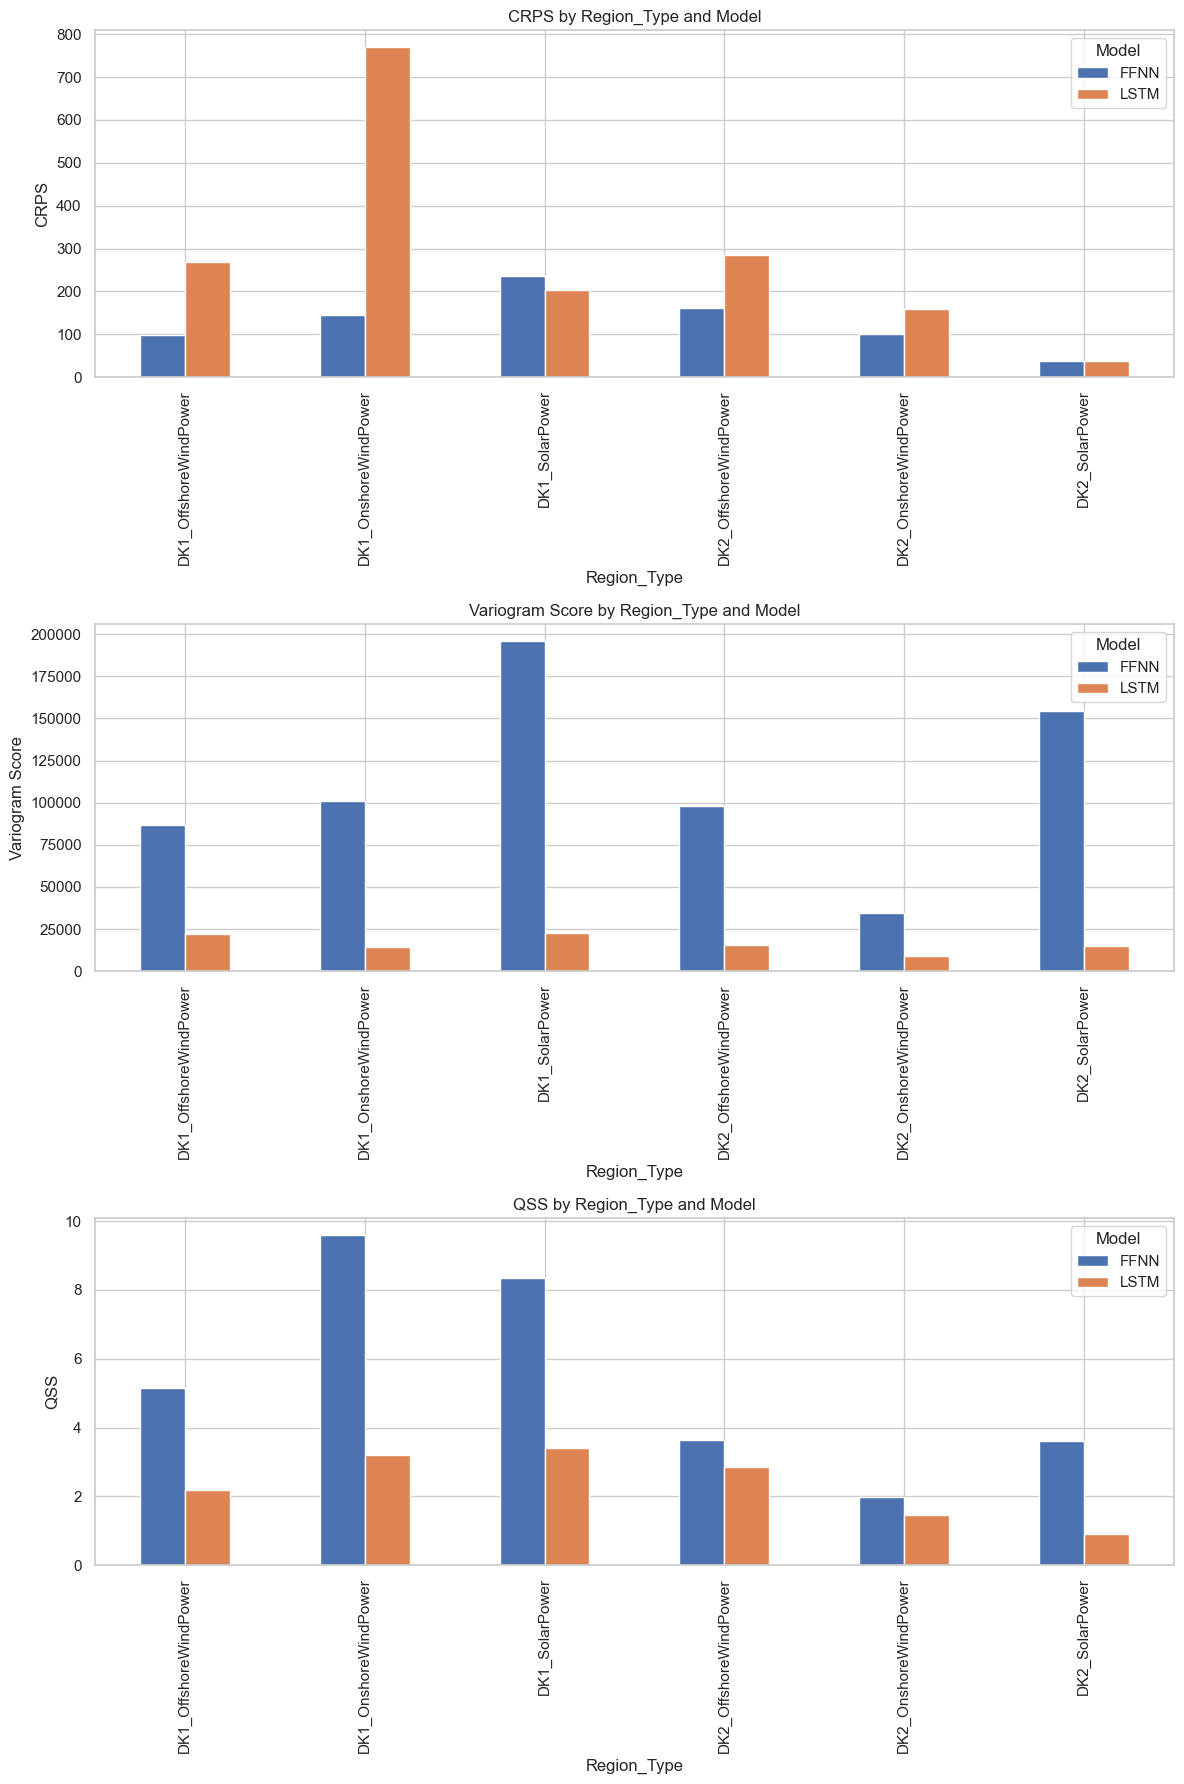

In [35]:
# Combine Region and Type to avoid duplicate entries in pivot table
df_grouped = results_df.copy()
df_grouped['Region_Type'] = df_grouped['Region'] + '_' + df_grouped['Type']

# Plotting the bar charts
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# CRPS
df_grouped.pivot(index='Region_Type', columns='Model', values='CRPS').plot(kind='bar', ax=axs[0], title='CRPS by Region_Type and Model')
axs[0].set_ylabel('CRPS')


# Variogram Score
df_grouped.pivot(index='Region_Type', columns='Model', values='Variogram Score').plot(kind='bar', ax=axs[1], title='Variogram Score by Region_Type and Model')
axs[1].set_ylabel('Variogram Score')

# QSS
df_grouped.pivot(index='Region_Type', columns='Model', values='QSS').plot(kind='bar', ax=axs[2], title='QSS by Region_Type and Model')
axs[2].set_ylabel('QSS')

plt.tight_layout()
plt.show()

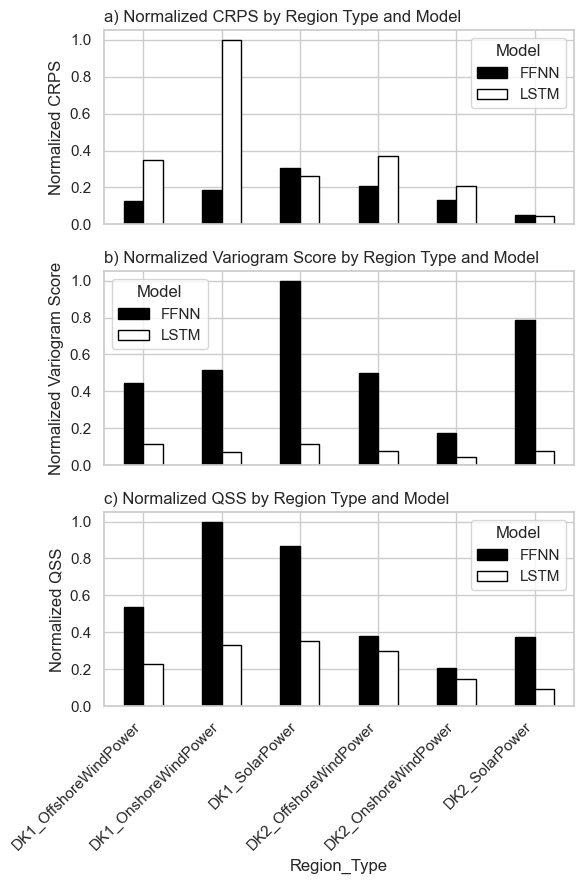

In [51]:
# Normalize the data by dividing each value by the maximum value in its column
df_normalized = df_grouped.copy()

for col in ['CRPS', 'Variogram Score', 'QSS']:
    max_val = df_normalized[col].max()
    df_normalized[col] = df_normalized[col] / max_val

# Plotting the normalized bar charts with custom colors and aligning x tick labels correctly
fig, axs = plt.subplots(3, 1, figsize=(6, 9))

colors = {'FFNN': 'white', 'LSTM': 'black'}
edgecolor = 'black'

# CRPS
df_normalized.pivot(index='Region_Type', columns='Model', values='CRPS').plot(
    kind='bar', ax=axs[0], title='a) Normalized CRPS by Region Type and Model',
    color=[colors.get(x, '#333333') for x in df_normalized['Model'].unique()], edgecolor=edgecolor
)
axs[0].set_ylabel('Normalized CRPS')
axs[0].set_xlabel("")
axs[0].set_xticklabels([])
axs[0].title.set_position((0.0, 1.0))
axs[0].title.set_ha('left')

# Variogram Score
df_normalized.pivot(index='Region_Type', columns='Model', values='Variogram Score').plot(
    kind='bar', ax=axs[1], title='b) Normalized Variogram Score by Region Type and Model',
    color=[colors.get(x, '#333333') for x in df_normalized['Model'].unique()], edgecolor=edgecolor
)
axs[1].set_ylabel('Normalized Variogram Score')
axs[1].set_xticklabels([])
axs[1].set_xlabel("")
axs[1].title.set_position((0.0, 1.0))
axs[1].title.set_ha('left')

# QSS
plot_data = df_normalized.pivot(index='Region_Type', columns='Model', values='QSS')
plot_data.plot(
    kind='bar', ax=axs[2], title='c) Normalized QSS by Region Type and Model',
    color=[colors.get(x, '#333333') for x in df_normalized['Model'].unique()], edgecolor=edgecolor
)
axs[2].set_ylabel('Normalized QSS')
axs[2].set_xlabel('Region_Type')
axs[2].set_xticklabels(plot_data.index, rotation=45, ha='right')
axs[2].title.set_position((0.0, 1.0))
axs[2].title.set_ha('left')

plt.tight_layout()
plt.savefig("normalized_scores_OE_vs_CE.pdf")
plt.show()
